In [106]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from catboost import CatBoostRegressor

In [107]:
# loadind the data
train= pd.read_csv("train_qnU1GcL.csv")
test= pd.read_csv("test__Szvtp7B_KytlNBf_48WC0Kd_OiVPtdp_ceb0kKC.csv")

In [108]:
# shape of training and testing data
train.shape, test.shape

((79853, 12), (34224, 11))

In [109]:
# printing first five rows
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,1


In [110]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [111]:
# columns in the dataset
train.columns, test.columns

(Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
        'target'],
       dtype='object'),
 Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
        'Count_3-6_months_late', 'Count_6-12_months_late',
        'Count_more_than_12_months_late', 'application_underwriting_score',
        'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
       dtype='object'))

In [112]:
# Data type of the columns
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [113]:
# Removing the unneccesary columns from train and test sata set
train = train.drop(['sourcing_channel','residence_area_type'],axis=1)
test = test.drop(['residence_area_type','sourcing_channel'], axis=1)

<AxesSubplot:ylabel='Frequency'>

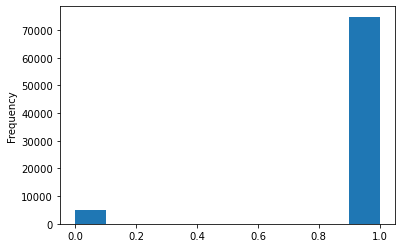

In [114]:
# distribution of target variable
train['target'].plot.hist()

In [115]:
# looking at the correlation between variables
corr= train.corr()

In [116]:
corr

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
id,1.000000,-0.004833,0.005184,-0.001798,-0.005660,-0.002125,0.003424,-0.002124,-0.003328,-0.005064
perc_premium_paid_by_cash_credit,-0.004833,1.000000,-0.259131,-0.031868,0.214470,0.214951,0.168125,-0.142670,-0.152837,-0.240980
age_in_days,0.005184,-0.259131,1.000000,0.029308,-0.058366,-0.072731,-0.059407,0.049888,0.176544,0.095103
Income,-0.001798,-0.031868,0.029308,1.000000,-0.001403,-0.017347,-0.012399,0.085746,0.079078,0.016541
Count_3-6_months_late,-0.005660,0.214470,-0.058366,-0.001403,1.000000,0.204228,0.296085,-0.082781,0.075828,-0.248900
Count_6-12_months_late,-0.002125,0.214951,-0.072731,-0.017347,0.204228,1.000000,0.266306,0.004785,-0.093133,-0.286159
Count_more_than_12_months_late,0.003424,0.168125,-0.059407,-0.012399,0.296085,0.266306,1.000000,-0.031726,-0.021848,-0.240385
application_underwriting_score,-0.002124,-0.142670,0.049888,0.085746,-0.082781,0.004785,-0.031726,1.000000,-0.270864,0.068715
no_of_premiums_paid,-0.003328,-0.152837,0.176544,0.079078,0.075828,-0.093133,-0.021848,-0.270864,1.000000,0.022664
target,-0.005064,-0.240980,0.095103,0.016541,-0.248900,-0.286159,-0.240385,0.068715,0.022664,1.000000


In [117]:
# looking for missing values in the datasaet
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
target                                 0
dtype: int64

In [118]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
dtype: int64

In [119]:
# checking for central statistics
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [120]:
# treating the missing values
train['Count_3-6_months_late'].fillna(0, inplace=True)
train['Count_6-12_months_late'].fillna(0, inplace=True)
train['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [121]:
test['Count_3-6_months_late'].fillna(0, inplace=True)
test['Count_6-12_months_late'].fillna(0, inplace=True)
test['Count_more_than_12_months_late'].fillna(0, inplace=True)

In [122]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mean(), inplace=True)
test['application_underwriting_score'].fillna(test['application_underwriting_score'].mean(), inplace=True)

In [123]:
# looking for missing values in the datasaet
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
dtype: int64

In [124]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
target                              0
dtype: int64

In [125]:
# breaking the training set into two to check the model
training= train[:60000]
validation= train[60000:]

In [126]:
x_train= training.drop('target', axis=1)
y_train= training['target']
x_val= validation.drop('target', axis=1)
y_val= validation['target']

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
# initialize the logistic regression model
logreg= LogisticRegression()

In [129]:
# fitting the model on x_train and y_train
logreg.fit(x_train, y_train)

LogisticRegression()

In [130]:
# checking the shape of x_train, y_train, x_val and y_val
x_train.shape,y_train.shape,x_val.shape,y_val.shape

((60000, 9), (60000,), (19853, 9), (19853,))

In [131]:
# making prediction on validation set
pred= logreg.predict(x_val)

In [132]:
# defining a function which will return the rmse score
def rmse(y, y_):
    y = np.exp(y),   
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [133]:
# calculating rmse of the predicted values
rmse(y_val,pred)

0.15271161270238282

In [134]:
logreg.score(x_val,y_val)

0.939354253765174

In [135]:
 from catboost import CatBoostRegressor

In [136]:
# initialize the catboost regressor model
cbr= CatBoostRegressor(iterations=300, depth=4, learning_rate=0.069, loss_function='RMSE' )

In [137]:
# fitting the model on x_train and y_train
cbr.fit(x_train, y_train)

0:	learn: 0.2408952	total: 21.8ms	remaining: 6.52s
1:	learn: 0.2388311	total: 46.2ms	remaining: 6.88s
2:	learn: 0.2368771	total: 67.3ms	remaining: 6.67s
3:	learn: 0.2352837	total: 88.7ms	remaining: 6.57s
4:	learn: 0.2337549	total: 111ms	remaining: 6.56s
5:	learn: 0.2324105	total: 132ms	remaining: 6.47s
6:	learn: 0.2313486	total: 153ms	remaining: 6.41s
7:	learn: 0.2302947	total: 175ms	remaining: 6.38s
8:	learn: 0.2294042	total: 189ms	remaining: 6.1s
9:	learn: 0.2285931	total: 198ms	remaining: 5.75s
10:	learn: 0.2278348	total: 207ms	remaining: 5.44s
11:	learn: 0.2272201	total: 215ms	remaining: 5.17s
12:	learn: 0.2266413	total: 223ms	remaining: 4.93s
13:	learn: 0.2260702	total: 232ms	remaining: 4.75s
14:	learn: 0.2255914	total: 240ms	remaining: 4.55s
15:	learn: 0.2251676	total: 248ms	remaining: 4.39s
16:	learn: 0.2247494	total: 255ms	remaining: 4.24s
17:	learn: 0.2244088	total: 262ms	remaining: 4.1s
18:	learn: 0.2240864	total: 269ms	remaining: 3.98s
19:	learn: 0.2237845	total: 276ms	remai

In [138]:
# making prediction on validation set
prediction= cbr.predict(x_val)

In [139]:
# calculating rmse of the predicted values
rmse(y_val,prediction)

0.1361667015820945

In [140]:
# applying the better model on testing data 
final_prediction= cbr.predict(test)

In [141]:
# checking the shape of final prediction
final_prediction.shape

(34224,)

In [142]:
submission= pd.DataFrame()

In [143]:
# creating a id column
submission['id'] = test['id']

In [144]:
# creating a target column and saving the predictions in it
submission['target'] = final_prediction

In [145]:
submission.to_csv('submission_shreekar.csv', header=True, index=False)

In [146]:
sub= pd.read_csv('submission_shreekar.csv')

In [147]:
sub.head()

,id,target
0,649,0.994799
1,81136,0.989462
2,70762,0.816033
3,53935,0.979002
4,15476,0.951624
